In [4]:
from slice_sampler import SliceSampler
from mh_componentwise import MetropolisHastingsComponentwise
import numpy as np
import scipy.stats as scps
import matplotlib.pyplot as plt

In [5]:
def normal_target(params, data):
    lp = 0
    for i in range(data.shape[0]):
        lp += scps.norm.logpdf(data[i], loc = params[0], scale = params[1])
    return lp

In [6]:
data = np.random.normal(loc = 0, scale = 1, size = 100)
bounds = np.array([[-10, 10], [0.1, 5]])

In [ ]:
my_slice_sampler = SliceSampler(bounds = bounds, target = normal_target)

In [ ]:
my_slice_sampler.sample(data, num_samples = 10, method = 'doubling', init_loc = 'random', add = True)

In [ ]:
plt.plot(my_slice_sampler.samples[500:, 0], my_slice_sampler.samples[500:, 1])
plt.xlabel('mean')
plt.ylabel('sd')

In [ ]:
plt.hist(my_slice_sampler.samples[500:, 0])

In [ ]:
plt.hist(my_slice_sampler.samples[500:, 1])

In [ ]:
my_slice_sampler.samples.shape

In [7]:
# Metropolis Hastings componentwise
mh_sampler = MetropolisHastingsComponentwise(dims = 2,
                                             num_chains = 4, 
                                             bounds = bounds, 
                                             target = normal_target, 
                                             proposal_var = 0.1)

In [10]:
mh_sampler.sample(data = data, num_samples = 500, add = True, n_cores = 4)

Beginning sampling
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900


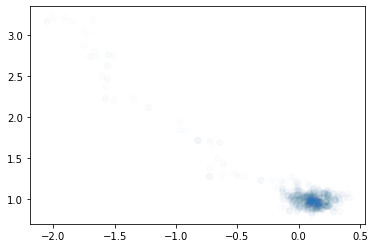

In [11]:
# SOME GRAPHS
plt.scatter(mh_sampler.samples[:, 2, :][:, 0], mh_sampler.samples[:, 2, :][:, 1], alpha = 0.01)

In [ ]:
plt.plot(np.arange(0, 3000, 1), mh_sampler.samples[:, 1, :][:, 1])

In [ ]:
plt.plot(np.arange(0, 3000, 1), mh_sampler.samples[:, 1, :][:, 0])

In [ ]:
plt.hist(mh_sampler.samples[1500:, 2, :][:, 0], bins = 30)

In [ ]:
plt.hist(mh_sampler.samples[1500:, 2, :][:, 1], bins = 30)

In [ ]:
mh_sampler.samples[101, :, :]

In [12]:
mh_sampler.lp.shape

(1000, 4)

In [13]:
mh_sampler.samples.shape

(1000, 4, 2)

In [24]:
x = np.arange(10)

In [25]:
x.pop(1)

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [26]:
x = [i for i in range(10)]

In [27]:
i, j = np.random.choice([2,3], size = 2)

In [19]:
i

2

In [20]:
j

3

In [28]:

x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]